In [41]:
# Cryptoassets Portofolio Optimization
# created by Nicolas 25/05/21

# In this script, we will construct a cryptocurrency portfolio 
# The portfolio will include the native currencies of the following smart contract platforms:
# - Cardano (ADA)
# - Ethereum (ETH)
# - Algorand (ALGO)
# - Zilliqa (ZIL)
# - Hedera Hashgraph (HBAR)
# - Solana (SOL)

# We will calculate the returns of all assets and their standard deviation to determine their volatility/risk
# We will also check for correlations
# Finally we will calculate the Sharpe Ratio
# The Sharpe Ratio will help us understand the return of an investment compared to its risk
# Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return

# We will run a simulation of 12,000 different possible portfolio allocation combinations
# We will pick the allocation with the highest sharpe ratio

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt

In [ ]:
# creating a dataframe
crypto_folio = pd.DataFrame()

In [ ]:
# getting the data

tickers = ['ADA-USD', 'ETH-USD', 'ALGO-USD', 'ZIL-USD', 'HBAR-USD', 'SOL1-USD']
start_date = '2020-10-10'
end_date = '2021-05-10'

crypto_folio = pdr.get_data_yahoo(tickers, start_date, end_date)


In [24]:
# we will mostly use the closing prices
crypto_folio['Close'].tail(3)

Symbols,ADA-USD,ETH-USD,ALGO-USD,ZIL-USD,HBAR-USD,SOL1-USD
Date,,,,,,
2021-05-08,1.770562,3928.844727,1.512605,0.234583,0.291887,44.330196
2021-05-09,1.644696,3952.293945,1.371486,0.207511,0.265903,42.909634
2021-05-10,1.764077,4168.701172,1.476457,0.219559,0.283242,44.577469


In [42]:
# calculating the mean daily return
crypto_folio['Close'].pct_change(1).mean()

Symbols
ADA-USD     0.015866
ETH-USD     0.012874
ALGO-USD    0.009623
ZIL-USD     0.014850
HBAR-USD    0.013398
SOL1-USD    0.017728
dtype: float64

In [26]:
# ada scores the highest ;)

In [27]:
# checking correlations
crypto_folio['Close'].pct_change(1).corr()

Symbols,ADA-USD,ETH-USD,ALGO-USD,ZIL-USD,HBAR-USD,SOL1-USD
Symbols,,,,,,
ADA-USD,1.000000,0.542663,0.501331,0.385733,0.264066,0.210058
ETH-USD,0.542663,1.000000,0.558932,0.412320,0.312296,0.306167
ALGO-USD,0.501331,0.558932,1.000000,0.449527,0.369176,0.260428
ZIL-USD,0.385733,0.412320,0.449527,1.000000,0.327293,0.131154
HBAR-USD,0.264066,0.312296,0.369176,0.327293,1.000000,0.235238
SOL1-USD,0.210058,0.306167,0.260428,0.131154,0.235238,1.000000


In [28]:
# Zilliqa (ZIL) and Solana (SOL) seem to have the lowest correlation with each other

In [29]:
# we will now use log returns
log_return = np.log(crypto_folio['Close']/crypto_folio['Close'].shift(1))
log_return

Symbols,ADA-USD,ETH-USD,ALGO-USD,ZIL-USD,HBAR-USD,SOL1-USD
Date,,,,,,
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-10,0.014303,0.011190,0.023384,0.042225,-0.009550,0.008479
2020-10-13,0.007099,0.011508,-0.015918,-0.080988,0.014480,-0.047230
2020-10-14,-0.006189,-0.005396,-0.036625,-0.021785,-0.024567,-0.021043
2020-10-15,-0.024406,-0.030158,-0.052106,-0.033372,-0.043408,-0.053026
...,...,...,...,...,...,...
2021-05-06,0.002015,-0.001764,0.025251,-0.035937,0.024490,-0.006943
2021-05-07,-0.020715,0.113265,-0.041628,0.037423,-0.028810,0.054265
2021-05-08,0.089146,0.006690,-0.003171,-0.001546,-0.018166,-0.027398


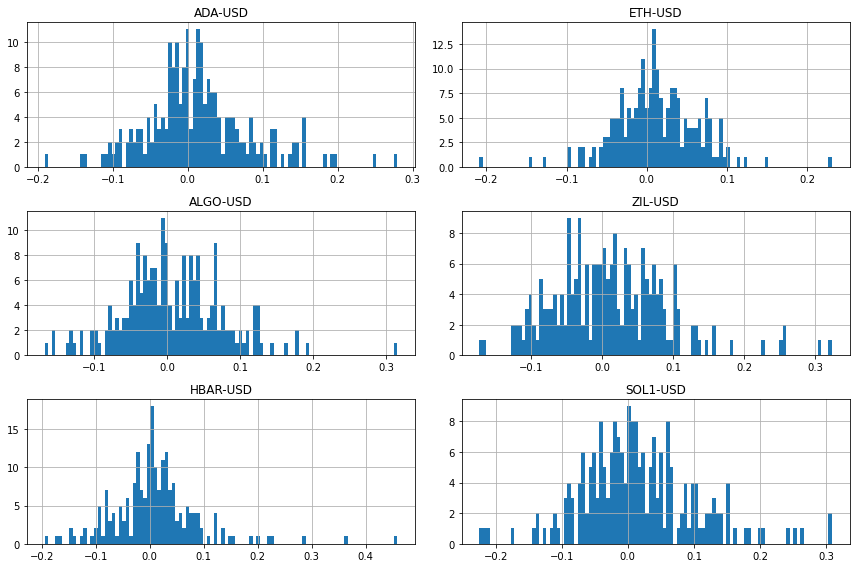

In [30]:
# plotting log returns on a histogram
log_return.hist(bins = 100, figsize=(12, 8));
plt.tight_layout();

In [31]:
# calculating yearly co-variance of log returns
log_return.cov()*365

Symbols,ADA-USD,ETH-USD,ALGO-USD,ZIL-USD,HBAR-USD,SOL1-USD
Symbols,,,,,,
ADA-USD,1.712640,0.735897,0.928649,0.856446,0.607894,0.493918
ETH-USD,0.735897,0.973951,0.763729,0.686345,0.539103,0.535281
ALGO-USD,0.928649,0.763729,1.738379,0.998617,0.837858,0.619126
ZIL-USD,0.856446,0.686345,0.998617,2.390966,0.874903,0.397826
HBAR-USD,0.607894,0.539103,0.837858,0.874903,2.337156,0.591230
SOL1-USD,0.493918,0.535281,0.619126,0.397826,0.591230,2.700097


In [32]:
# Let's now put in some allocation weights and run 12,000 different possible combinations of this portfolio

# setting seed
np.random.seed(101)

num_of_simulations = 12000
all_weights = np.zeros((num_of_simulations, len(tickers)))
returns_arr = np.zeros(num_of_simulations)
volatility_arr = np.zeros(num_of_simulations)
sharpe_arr = np.zeros(num_of_simulations)


# creating a loop to run 12,000 different allocation combinations 
for index in range(num_of_simulations):
    
    # weights
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    
    # save the weights
    all_weights[index, :] = weights

    # calculating yearly expected portfolio return
    returns_arr[index] = np.sum(log_return.mean()*weights *365)

    # calculating yearly expected volatility
    volatility_arr[index] = np.sqrt(np.dot(weights.T, np.dot (log_return.cov()*365, weights)))

    # Sharpe Ratio
    sharpe_arr[index] = returns_arr[index] / volatility_arr[index]

In [33]:
# finding the max return
sharpe_arr.max()

4.840512537729179

In [34]:
# finding the location of that max sharpe
sharpe_arr.argmax()

3656

In [35]:
# using the index location to check the optimal allocations 
all_weights[3656, :]

array([0.19613342, 0.43038541, 0.00109518, 0.02323254, 0.11354853,
       0.23560492])

In [36]:
max_return = returns_arr[3656]
max_volatility = volatility_arr[3656]


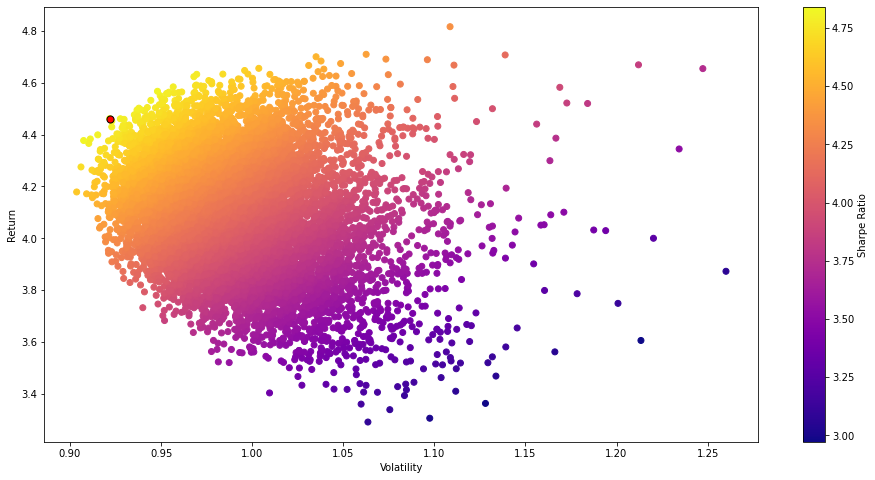

In [37]:
plt.figure(figsize=(16, 8));
plt.scatter(volatility_arr, returns_arr, c=sharpe_arr, cmap='plasma');
plt.colorbar(label = 'Sharpe Ratio');
plt.xlabel('Volatility');
plt.ylabel('Return');

# grabbing the max sharpe ratio (will plot as a red dot)
plt.scatter(max_volatility, max_return, c='red', s=50, edgecolors='black');

In [ ]:
# Conclusion:
# The allocation combination with the highest sharpe ratio:
# Cardano (ADA): 19.61%
# Ethereum (ETH): 43.03%
# Algorand (ALGO): 0.10%
# Zilliqa (ZIL): 2.32%
# Hedera (HBAR): 23.56%
# Solana(SOL): 11.35%

# Although at the end of the day allocation will always depend on the risk tolerance of each individual
# The above allocation is considered one with a high return and a relatively low risk